# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## TaskList 06: Exploratory Data Analysis - EDA

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### Intro

This 'tasklist' is going to be actually one open/free-form task. You'll be provided with a dataset, and your goal is to apply what you've learned about on Session06 (and previous sessions) to perform EDA on this dataset. There are no wrong answers here - you are going to look through the dataset provided, and offer insights you find relevant and interesting. In order to do so, you will use tables, cross-tables and various visualizations. And don't forget to describe your insights using text! 

In essence, the output of this tasklist should be in the form of an exploratory report on the dataset provided. 

### The Dataset

The dataset in question is `rome_weekends.csv`. It is a dataset containing prices of Airbnb properties in Rome during the weekends, along with various additional data. It is a part of a larger dataset `Airbnb Prices in European Cities`, which can be found [here](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities). If doing EDA on `rome_weekends` was a fun ride, you're encouraged to download a dataset for some other city, perform the same analysis and compare the results. 



The field names of this dataset may look a bit cryptical, so here's a brief description for each of them:

- `realSum` - The total price of the Airbnb listing
- `room_type` - The type of room being offered (e.g. private, shared, etc.)
- `room_shared` - Whether the room is shared or not
- `room_private` - Whether the room is private or not
- `person_capacity` - The maximum number of people that can stay in the room.
- `host_is_superhost` - Whether the host is a superhost or not
- `multi` - Whether the listing is for multiple rooms or not
- `biz` - Whether the listing is for business purposes or not
- `cleanliness_rating` - The cleanliness rating of the listing
- `guest_satisfaction_overall` - The overall guest satisfaction rating of the listing
- `bedrooms` - The number of bedrooms in the listing
- `dist` - The distance from the city centre
- `metro_dist` - The distance from the nearest metro station
- `lng` - The longitude of the listing
- `lat` - The latitude of the listing

### Preparation

Before embarking on this explorations, let's make some first necessary steps.

First, import all the Python libraries you are going to use during your EDA.

In [1]:
### your code here ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Next, load `rome_weekends.csv` dataset from the `_data` folder in `Session06`.

In [2]:
### your code here ###
work_dir = os.getcwd()
print(work_dir)
print(os.listdir(work_dir))
data_dir = os.path.join(work_dir, "_data")
os.listdir(data_dir)
filepath = os.path.join(data_dir, 'rome_weekends.csv')
df = pd.read_csv(filepath, index_col=0)
df.head()

/home/ikacikac/workspace/dss03python2023/session06
['dss03_py_session06_b.ipynb', 'tasklist06_solutions.html', 'dss03_py_session06_goran.ipynb', '_img', 'tasklist06.ipynb', 'dss03_py_session06.html', 'tasklist06.html', 'data_mumbojumbo.ipynb', 'dss03_py_session06.ipynb', 'tasklist06_solutions.ipynb', '_data']


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,172.772543,Private room,False,True,2.0,False,0,0,10.0,93.0,1,1.222582,0.397760,550.078435,12.187232,1075.412107,23.430621,12.50181,41.88987
1,156.874664,Private room,False,True,2.0,True,1,0,10.0,95.0,1,2.978482,1.595742,281.162756,6.229285,697.725034,15.201736,12.48654,41.92498
2,195.917986,Private room,False,True,2.0,False,1,0,9.0,80.0,1,0.935379,0.649273,482.708059,10.694611,1251.514249,27.267459,12.49627,41.90801
3,298.552825,Entire home/apt,False,False,4.0,False,0,1,9.0,90.0,1,2.203023,0.494699,691.716421,15.325284,1625.911297,35.424663,12.47700,41.90700
4,131.391298,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.295984,0.867473,317.074092,7.024917,836.616071,18.227835,12.51544,41.89463


And now: the stage is yours. 

## EDA

### Are there any missing data?

In [3]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False)
   .assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))

,feature,no_nulls,perc_nulls
0,realSum,0,0.0
10,bedrooms,0,0.0
17,lng,0,0.0
16,rest_index_norm,0,0.0
15,rest_index,0,0.0
14,attr_index_norm,0,0.0
13,attr_index,0,0.0
12,metro_dist,0,0.0
11,dist,0,0.0
9,guest_satisfaction_overall,0,0.0


#### Inspect the distribution of `realSum` (i.e. listing price)

Descriptive Statistics.

In [4]:
df['realSum'].describe()

count    4535.000000
mean      209.130063
std       119.367764
min        46.057092
25%       138.638861
50%       184.462161
75%       242.676455
max      2311.738714
Name: realSum, dtype: float64

Boxplot w. outliers.

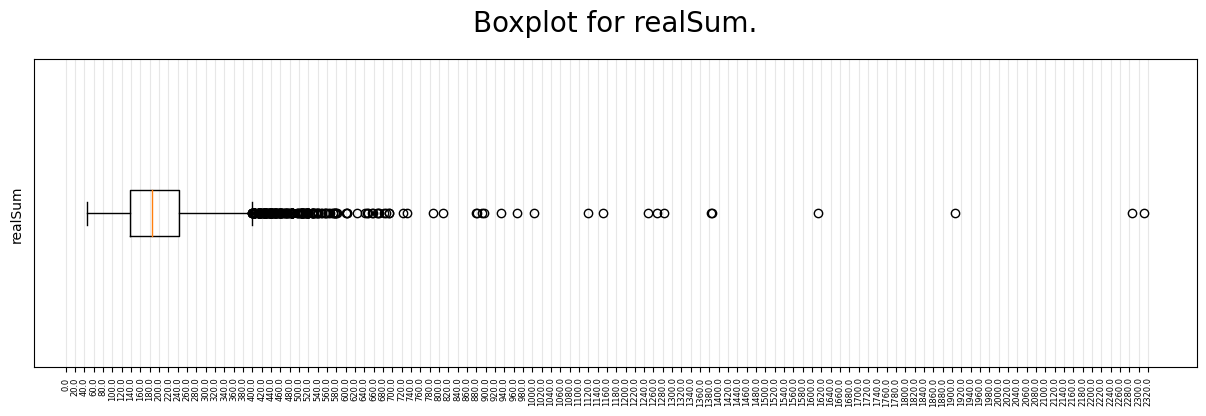

In [5]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.boxplot(df['realSum'], vert=False);
ax.grid(alpha=.3)
ax.set_title('Boxplot for realSum.', size=20, pad=20)
ax.set_xticks(np.arange(0, df.realSum.max()+20, 20));
ax.set_xticklabels(ax.get_xticks(), rotation = 90, size=6)
ax.set_ylabel('realSum')
ax.set_yticks([]);

We can see that there are tons of (at least) mild outliers in `realSum`.

Distribution (Histogram).

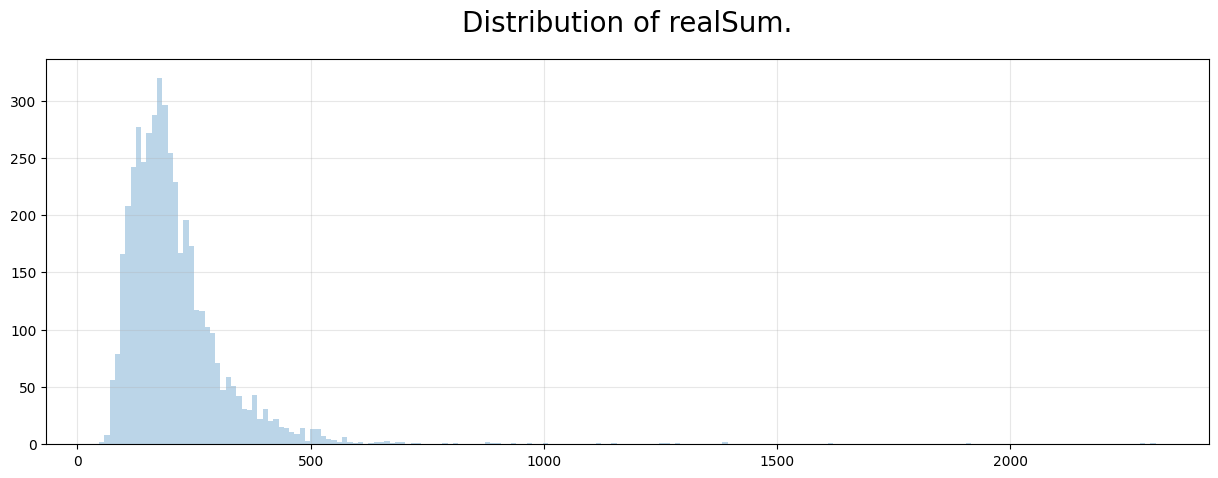

In [6]:
# setup
fig, ax = plt.subplots(figsize=(15, 5))

# histogram
ax.hist(df.realSum, bins=200, alpha=.3)
ax.set_title('Distribution of realSum.', size=20, pad=20)
ax.grid(alpha=.3)

To inspect the distribution of `realSum` in more depth, I want to check whether it exhibits a [Power law behavior](https://en.wikipedia.org/wiki/Power_law) at least approximately. In order to do so, I will first rank the prices in `realSum`, and then plot (a) a Rank-Price plot alongside (b) log(Rank)-log(Price) plot. Variables that exhibit power law behaviour are also known to exhbit a linear rank-value relationship in the log space (however, **that is not an ultimate test of power-laws**, as exemplified nicely in [Clauset, A.; Shalizi, C. R.; Newman, M. E. J. (2009). "Power-Law Distributions in Empirical Data". SIAM Review. 51 (4): 661–703.](https://arxiv.org/abs/0706.1062)).  

Rank `realSum` first:

In [7]:
df_realsum = df['realSum'].reset_index()
df_realsum = df_realsum.sort_values("realSum", ascending=False)
df_realsum.rename(columns={'realSum':'price'}, inplace=True)
df_realsum.drop('index', axis=1, inplace=True)
df_realsum['rank'] = df_realsum['price'].rank(ascending=False)
df_realsum

,price,rank
3374,2311.738714,1.0
362,2286.489140,2.0
3404,1907.044163,3.0
890,1613.634770,4.0
2263,1384.752063,5.0
...,...,...
2701,62.422556,4531.0
2112,57.746709,4532.5
2111,57.746709,4532.5
2962,55.408786,4534.0


Rank-Price vs. log(Rank)-log(Price) plots (include linear regression model):

Text(0.5, 0, 'log(rank)')

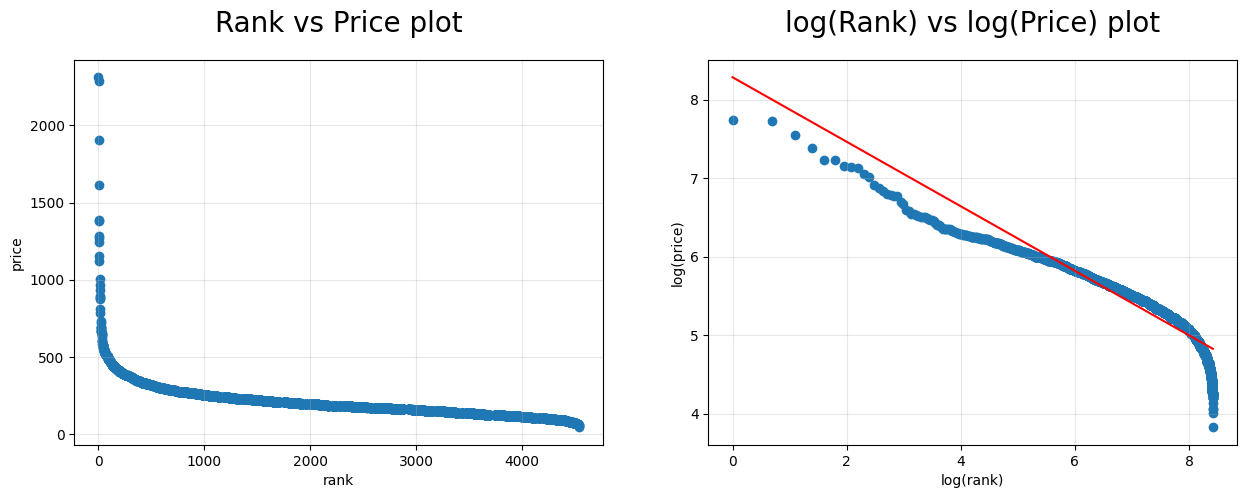

In [8]:
# setup figure and axes
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

# flatten for easier indexing
axes = axes.flatten()

# Rank vs Price
axes[0].scatter(x=df_realsum['rank'], y=df_realsum['price'])
axes[0].set_title('Rank vs Price plot', size=20, pad=20)
axes[0].grid(alpha=.3)
axes[0].set_ylabel('price')
axes[0].set_xlabel('rank')

# log(Rank) vs log(Price)
axes[1].scatter(x=np.log(df_realsum['rank']), y=np.log(df_realsum['price']))
axes[1].set_title('log(Rank) vs log(Price) plot', size=20, pad=20)
x = np.log(df_realsum['rank'])
y = np.log(df_realsum['price'])
m, b = np.polyfit(x, y, 1)
axes[1].plot(x, m*x+b, color="red")

axes[1].grid(alpha=.3)
axes[1].set_ylabel('log(price)')
axes[1].set_xlabel('log(rank)')

A Power law? Well, I do not think so. Maybe in a subset of the price (`realSum`) distribution only, but we will not go for testing now.

#### Do hosts and superhosts differ in prices? 

In [9]:
df[['host_is_superhost','realSum']]\
    .groupby('host_is_superhost')\
    .agg(['mean','median', 'std'])

realSum                        
                         mean      median         std
host_is_superhost                                    
False              206.820016  182.358030  126.526739
True               214.105177  190.774554  102.125657

Well, only slightly, but the standard deviation of `realSum` seems to be higher in the group of hosts that are not recognized as superhosts. Let me inspect the `realSum` distributions in these two groups on the log scale again:

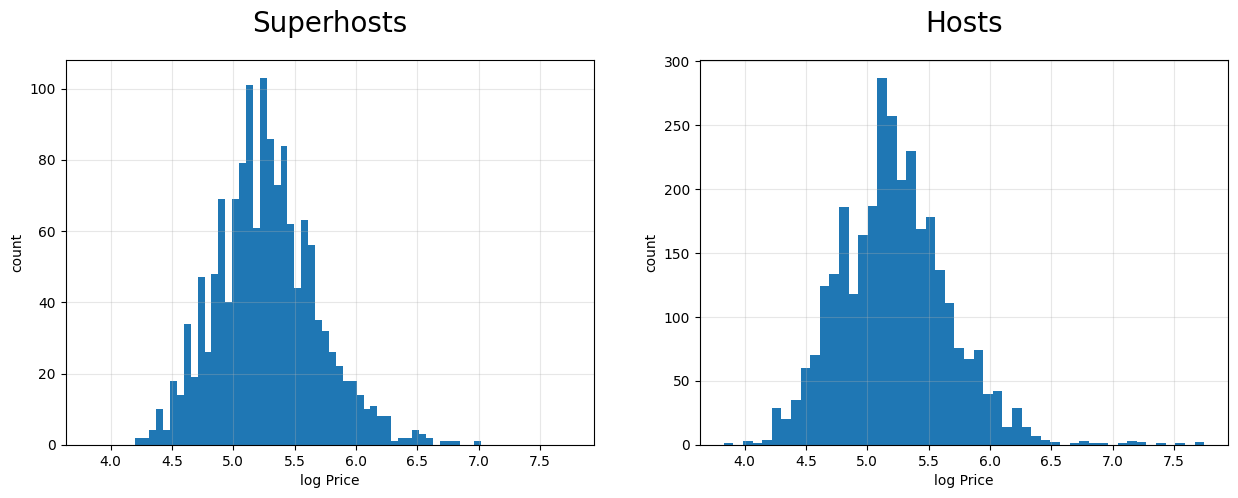

In [10]:
# setup figure and axes
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharex=True)

# flatten for easier indexing
axes = axes.flatten()

# superhosts
axes[0].hist(x=np.log(df.loc[df['host_is_superhost']==True, 'realSum']), bins=50)
axes[0].set_title('Superhosts', size=20, pad=20)
axes[0].grid(alpha=.3)
axes[0].set_ylabel('count');
axes[0].set_xlabel('log Price');

# hosts
axes[1].hist(x=np.log(df.loc[df['host_is_superhost']==False, 'realSum']), bins=50)
axes[1].set_title('Hosts', size=20, pad=20)
axes[1].grid(alpha=.3)
axes[1].set_ylabel('count');
axes[1].set_xlabel('log Price');

### Business purposes: do they affect the price?

Assuming that `1s` stand for `True` and `0s` for `False`...

In [11]:
df[['biz','realSum']]\
    .groupby('biz')\
    .agg(['mean','median', 'std'])

realSum                        
           mean      median         std
biz                                    
0    204.331703  182.474926  124.197171
1    218.489519  195.917986  108.766865

It seems that listings for business purposes exclusively are more expensive indeed (and consistently so: look at the standard deviation).

#### Is overall guest satisfaction somehow related to price?

We will look at `realSum` for listings above and below the median of `guest_satisfaction_overall`:

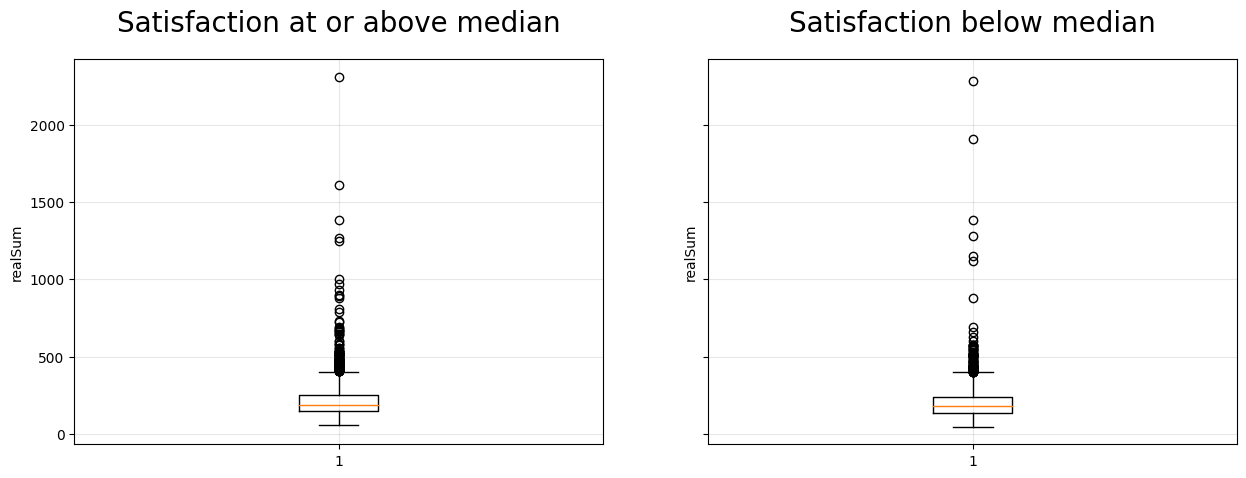

In [12]:
# figure and axes
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

# flatten for easier indexing
axes = axes.flatten()

# satisfaction >= median
axes[0].boxplot(df.loc[df['guest_satisfaction_overall'] >= df['guest_satisfaction_overall'].median(),\
                     'realSum'], vert=True);
axes[0].set_title('Satisfaction at or above median', size=20, pad=20)
axes[0].grid(alpha=.3)
axes[0].set_ylabel('realSum');

# satisfaction < median
axes[1].boxplot(df.loc[df['guest_satisfaction_overall'] < df['guest_satisfaction_overall'].median(),\
              'realSum'], vert=True);
axes[1].set_title('Satisfaction below median', size=20, pad=20)
axes[1].grid(alpha=.3)
axes[1].set_ylabel('realSum');

The boxplots are not really informative in this case.

In [13]:
df[['guest_satisfaction_overall', 'realSum']]\
    .assign(above_median_satisfication = df['guest_satisfaction_overall'] >= df['guest_satisfaction_overall'].median())\
    .drop('guest_satisfaction_overall', axis=1)\
    .groupby('above_median_satisfication')\
    .agg(['mean', 'median', 'std'])

realSum                        
                                  mean      median         std
above_median_satisfication                                    
False                       200.678054  178.617352  116.319948
True                        216.871489  190.073177  121.602579

We find some differences in respect to the overal guest satisfaction, this time the standard deviation of `realSum` being higher among the more expensive listings (for which satisfaction is found above median).

#### Distance from city centre and price

I will first `pd.cut()` the `dist` variable into five equaly wide-spread intervals: 

In [14]:
df['qdist'] = pd.cut(x=df['dist'], bins=5, include_lowest=True)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,qdist
0,172.772543,Private room,False,True,2.0,False,0,0,10.0,93.0,1,1.222582,0.397760,550.078435,12.187232,1075.412107,23.430621,12.50181,41.88987,"(0.0323, 1.945]"
1,156.874664,Private room,False,True,2.0,True,1,0,10.0,95.0,1,2.978482,1.595742,281.162756,6.229285,697.725034,15.201736,12.48654,41.92498,"(1.945, 3.847]"
2,195.917986,Private room,False,True,2.0,False,1,0,9.0,80.0,1,0.935379,0.649273,482.708059,10.694611,1251.514249,27.267459,12.49627,41.90801,"(0.0323, 1.945]"
3,298.552825,Entire home/apt,False,False,4.0,False,0,1,9.0,90.0,1,2.203023,0.494699,691.716421,15.325284,1625.911297,35.424663,12.47700,41.90700,"(1.945, 3.847]"
4,131.391298,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.295984,0.867473,317.074092,7.024917,836.616071,18.227835,12.51544,41.89463,"(0.0323, 1.945]"


The group means plot can be easily obtained from Pandas directly by relying on `groupby` then:

<AxesSubplot: xlabel='Distance', ylabel='Average Price'>

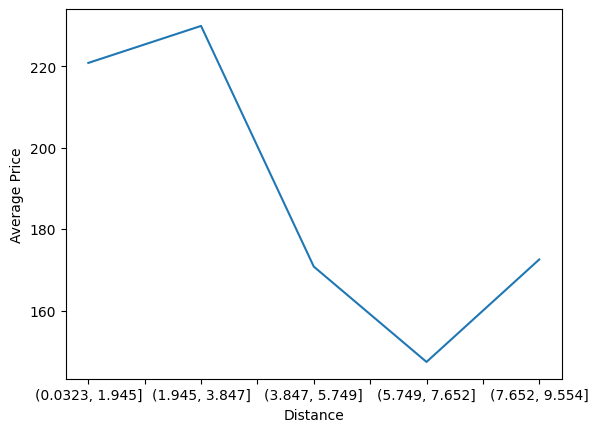

In [15]:
df.groupby('qdist').realSum.mean().plot(xlabel="Distance", ylabel="Average Price")

Obviously, the lesser the distance from the city centre - the higher the listing price. However, it seems that there is an anomaly present: look at the average price in the most distant places.

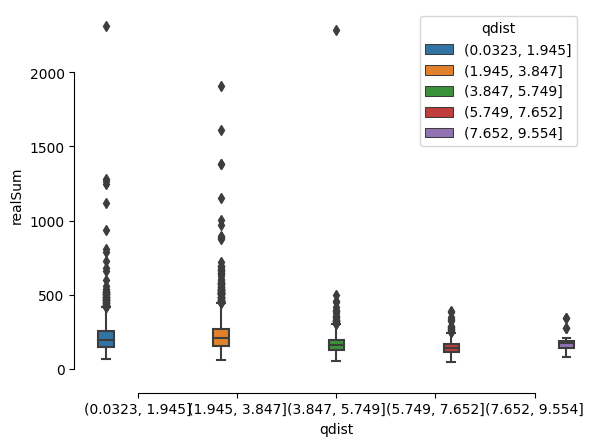

In [16]:
sns.boxplot(x="qdist", y="realSum",
            hue="qdist",
            data=df)
sns.despine(offset=10, trim=True)

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>